In [1]:
# Importing required packages
import numpy as np
import pandas as pd

import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid') 


In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
data = pd.read_csv('cubic_zirconia.csv')

In [4]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
data.shape

(26967, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
#The first column seems to be just index
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


#### Points to notice:

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [8]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(26958, 10)

In [9]:
# Checking the types of the data-inputes to prevent errors in computing. 
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

## univariate analysis

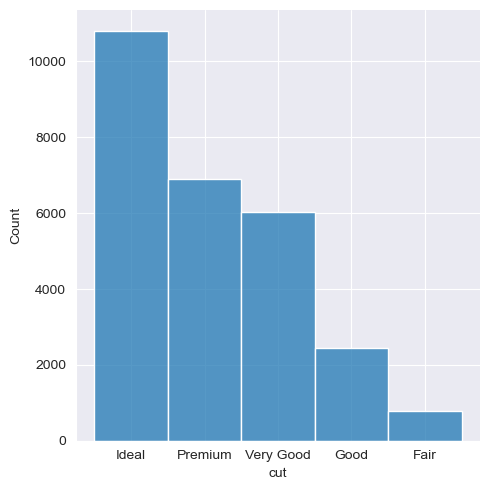

In [10]:
# Display diamond frequency for each cut quality (Fair, Good, Very Good, Premium, Ideal)
sns.displot(data=data, x=data["cut"])

<AxesSubplot:xlabel='cut', ylabel='count'>

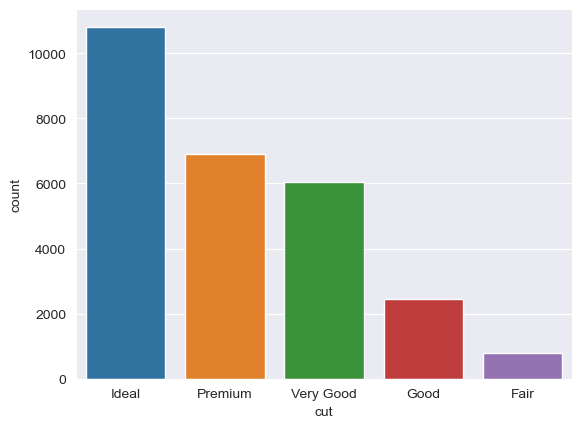

In [11]:
sns.countplot(x = "cut", data = data)

<AxesSubplot:xlabel='color', ylabel='count'>

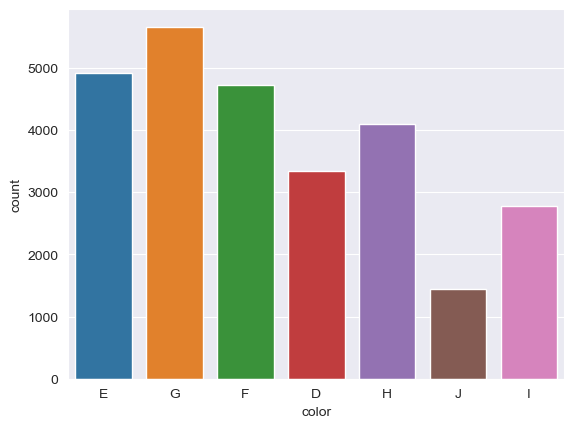

In [12]:
sns.countplot(x = "color", data = data)

<AxesSubplot:xlabel='clarity', ylabel='count'>

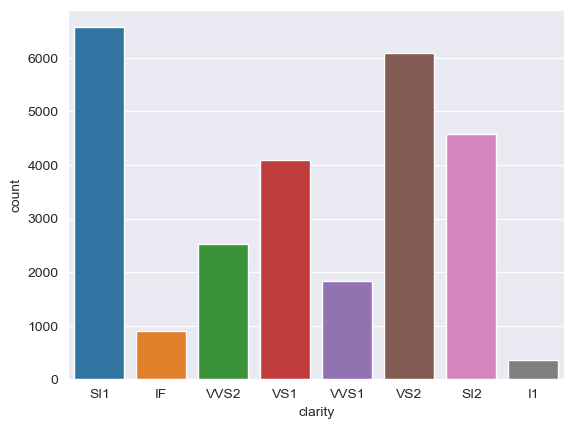

In [13]:
sns.countplot(x = "clarity", data = data)

<AxesSubplot:xlabel='price', ylabel='Count'>

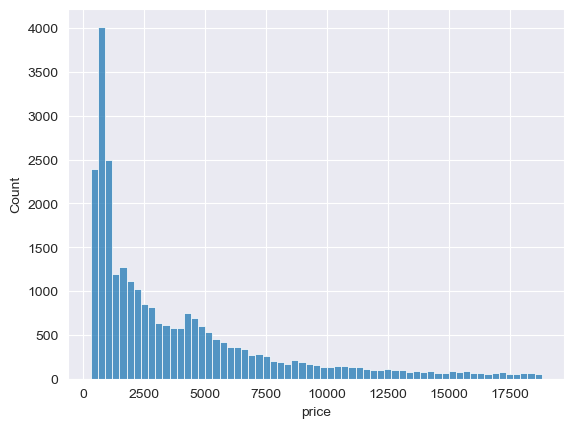

In [14]:
#Target Column 
sns.histplot(x = "price" , data = data)

<AxesSubplot:ylabel='carat'>

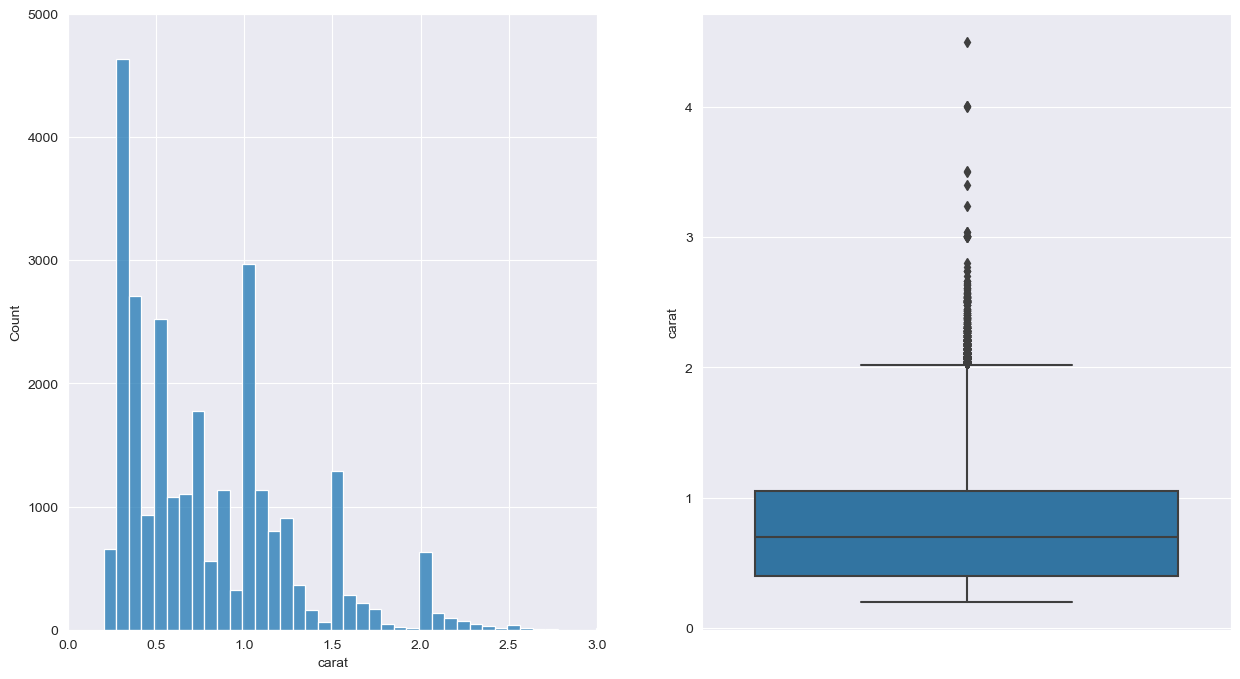

In [15]:
plt.figure(figsize = (15,8))
plt.subplot(121)
plt.axis([0,3,0,5000])
sns.histplot(x = "carat" , data = data , bins = 60)
plt.subplot(122)
sns.boxplot(y = "carat" , data = data)

<AxesSubplot:ylabel='x'>

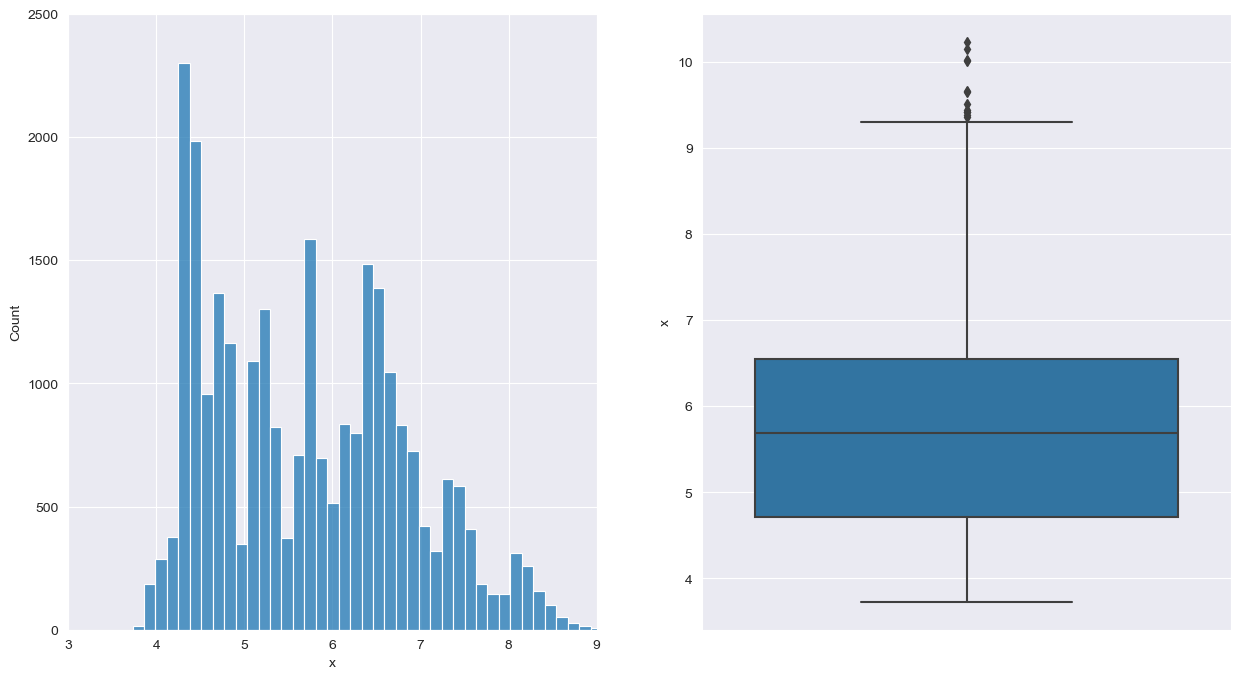

In [16]:
plt.figure(figsize = (15,8))
plt.subplot(121)
plt.axis([3,9,0,2500])
sns.histplot(x = "x" , data = data, bins = 50)
plt.subplot(122)
sns.boxplot(y = "x" , data = data)

<AxesSubplot:ylabel='y'>

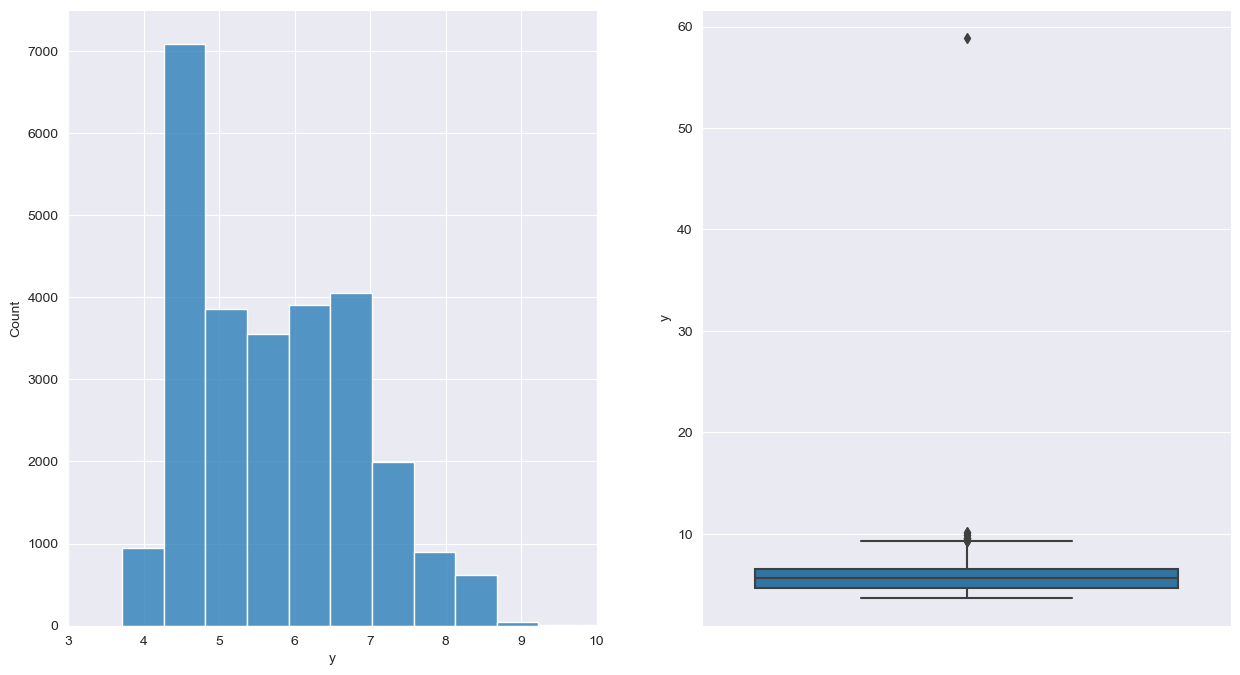

In [17]:
plt.figure(figsize = (15,8))
plt.subplot(121)
plt.axis([3,10,0,7500])
sns.histplot(x = "y" , data = data, bins = 100)
plt.subplot(122)
sns.boxplot(y= "y" , data = data)

<AxesSubplot:ylabel='z'>

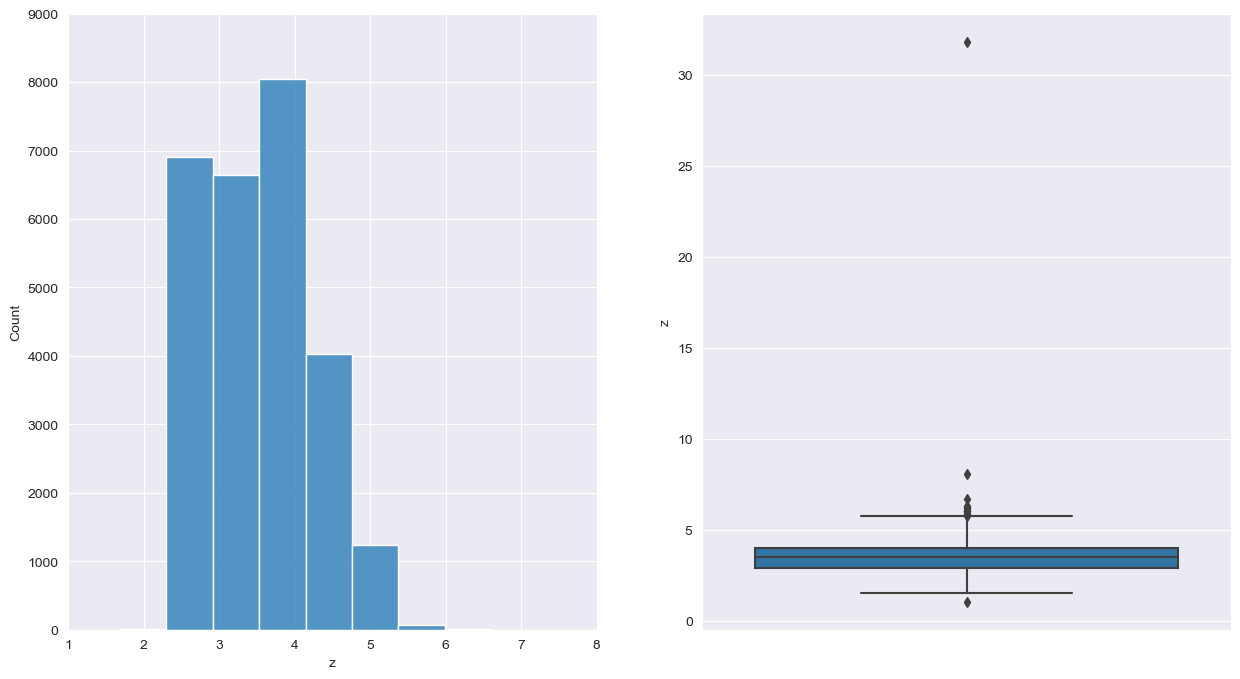

In [18]:
plt.figure(figsize = (15,8))
plt.subplot(121)
plt.axis([1,8,0,9000])
sns.histplot(x = "z" , data = data, bins = 50)
plt.subplot(122)
sns.boxplot(y = "z" , data = data)

## Bivariate Analysis

In [19]:
# Looking for Correlations
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending = False)

price    1.000000
carat    0.922409
x        0.887501
y        0.857361
z        0.855920
table    0.127088
depth   -0.002381
Name: price, dtype: float64

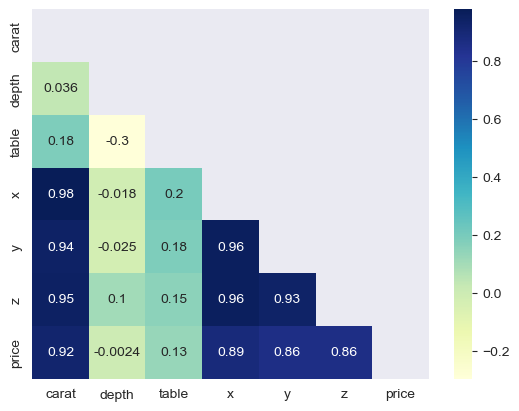

In [20]:
# creating mask
mask = np.triu(np.ones_like(data.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

There is a strong Correlation between x,y,z,carat and Price.

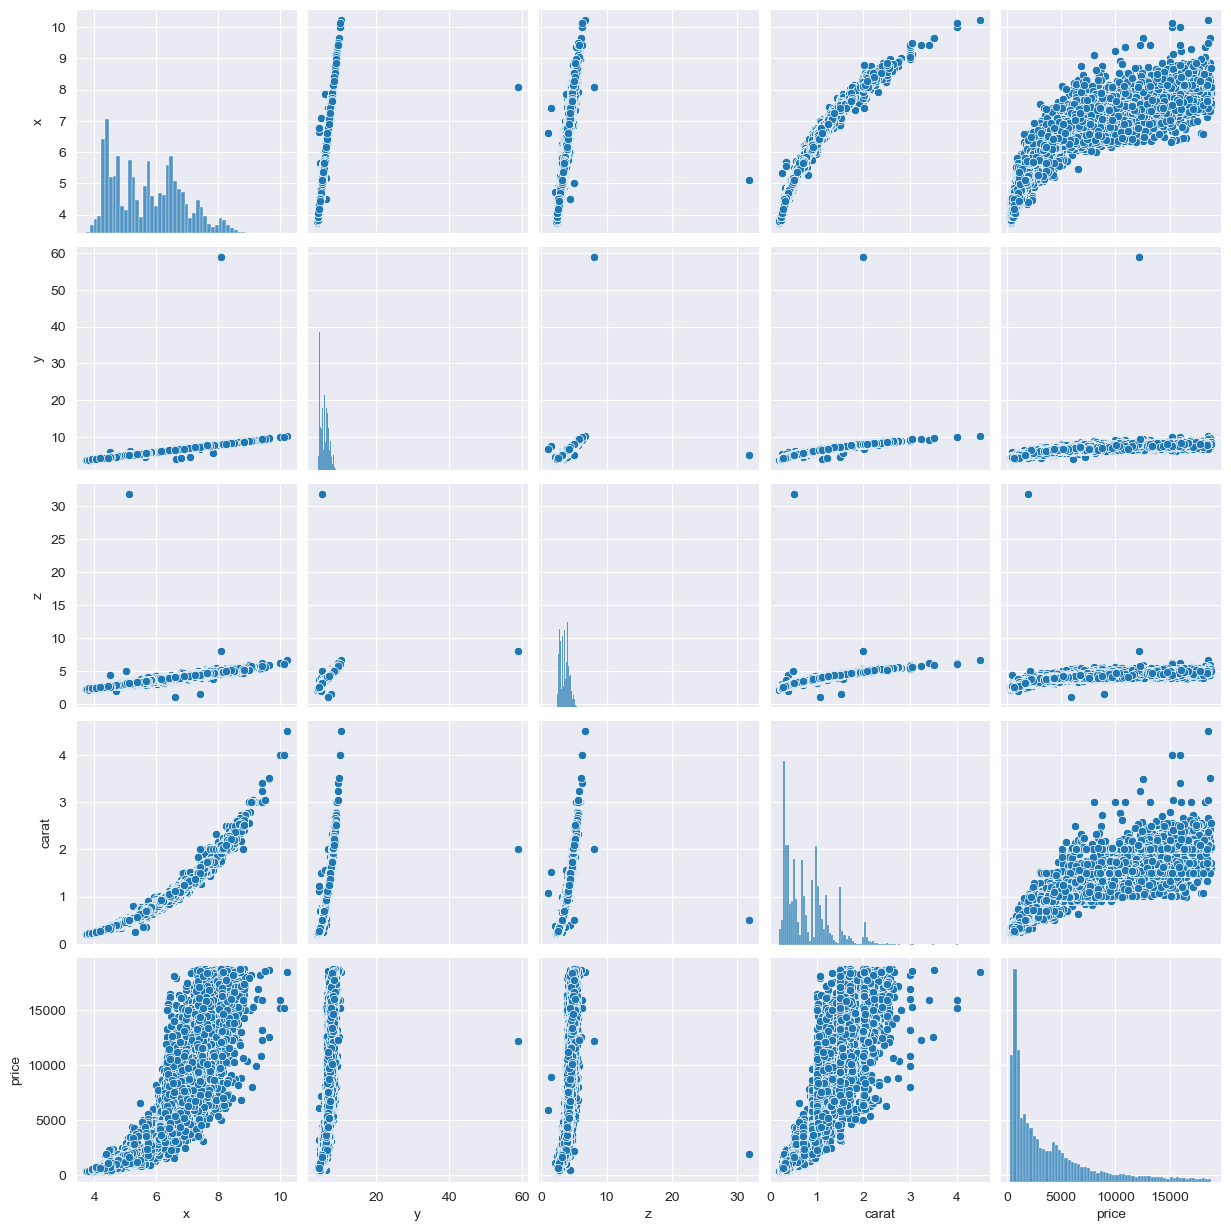

In [21]:
attr =["x","y","z","carat","price"]
sns.pairplot(data[attr])

Clearly, there are some Outliers

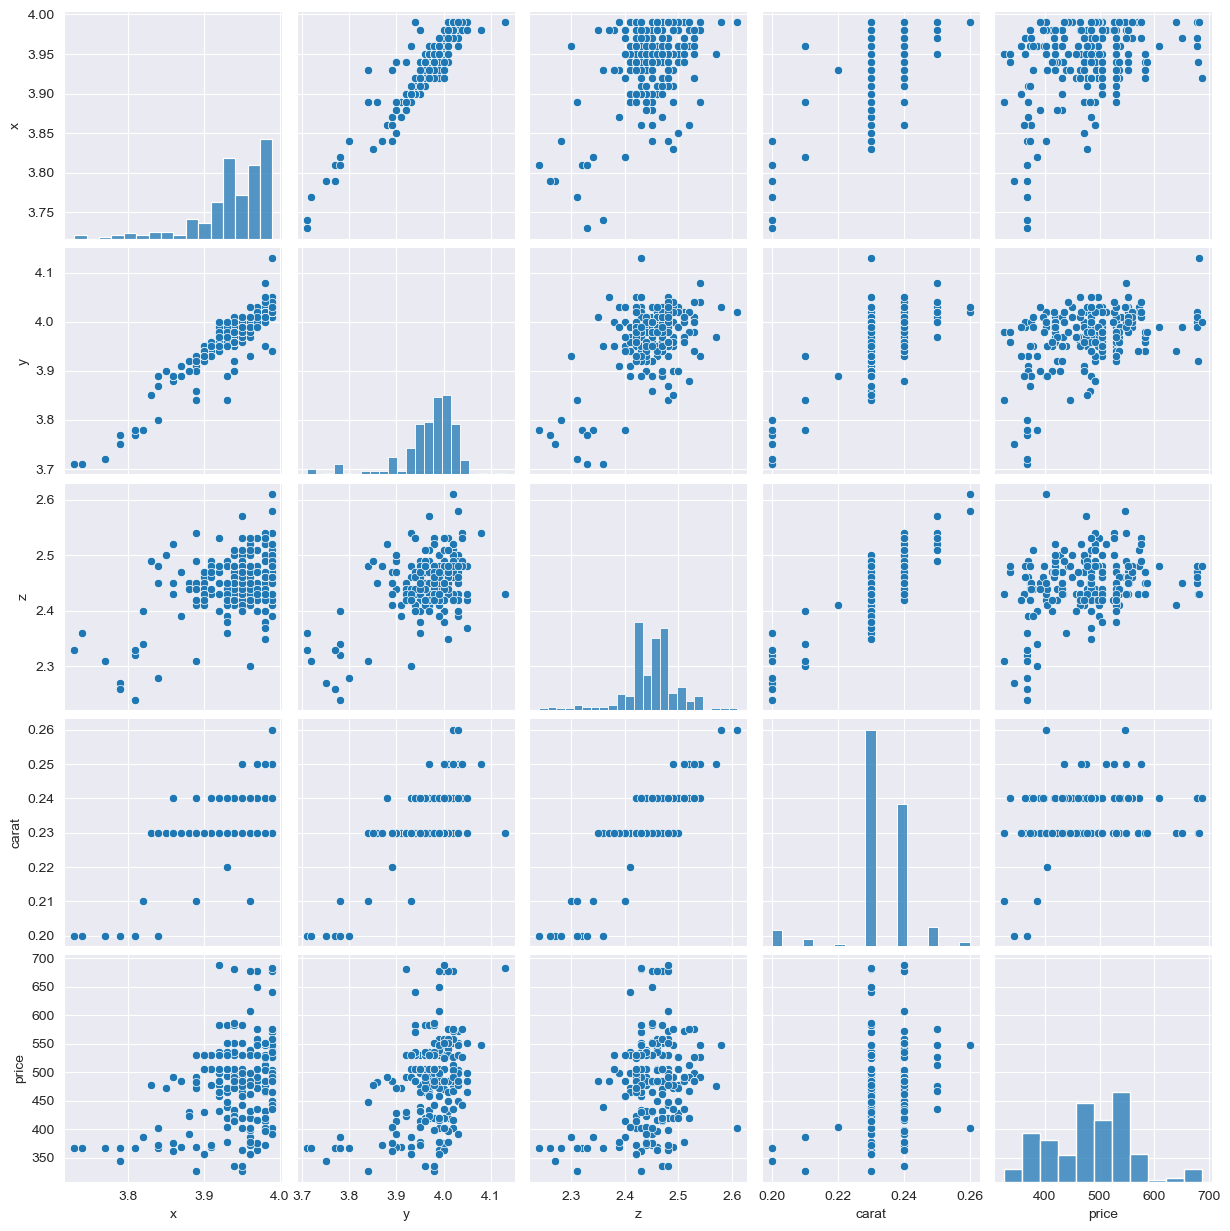

In [22]:
# Remove Outliers
data = data[data["x"]<4]
data = data[data["y"]<40]
data = data[(data["z"]>2) & (data["z"]<15)]
sns.pairplot(data[attr])

Viz Categorical Data with Target Column

<AxesSubplot:xlabel='cut', ylabel='price'>

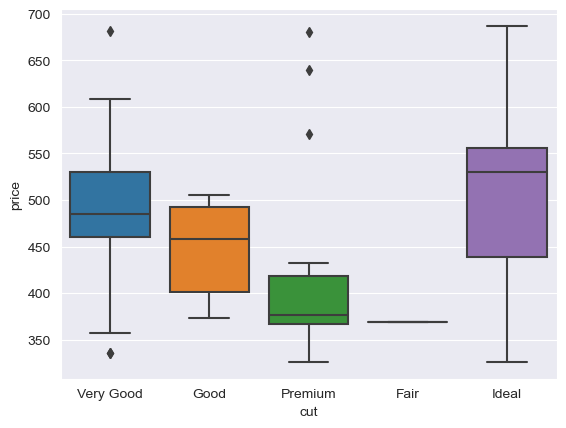

In [23]:
sns.boxplot(x= "cut" , y = "price" , data = data)

<AxesSubplot:xlabel='color', ylabel='price'>

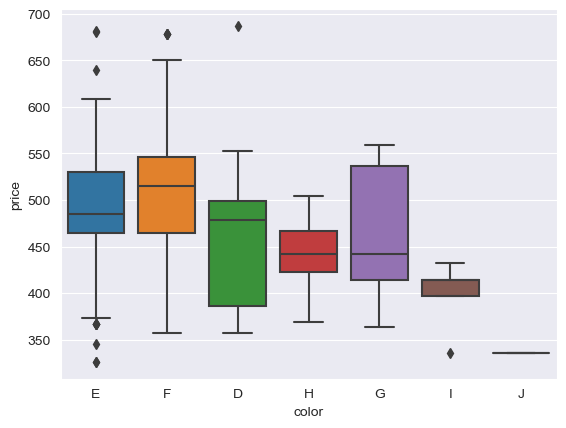

In [24]:
sns.boxplot(x= "color" , y = "price" , data = data)

<AxesSubplot:xlabel='clarity', ylabel='price'>

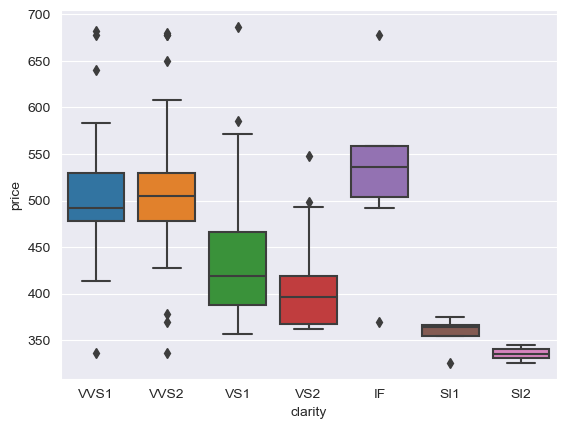

In [25]:
sns.boxplot(x= "clarity" , y = "price" , data = data)

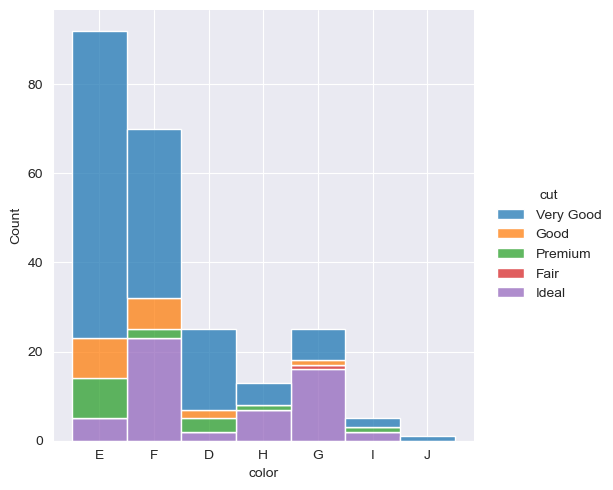

In [26]:
# Display diamond frequency for each cut quality (Fair, Good, Very Good, Premium, Ideal)
sns.displot(data=data, x=data["color"], hue="cut", multiple="stack")

<AxesSubplot:xlabel='cut', ylabel='price'>

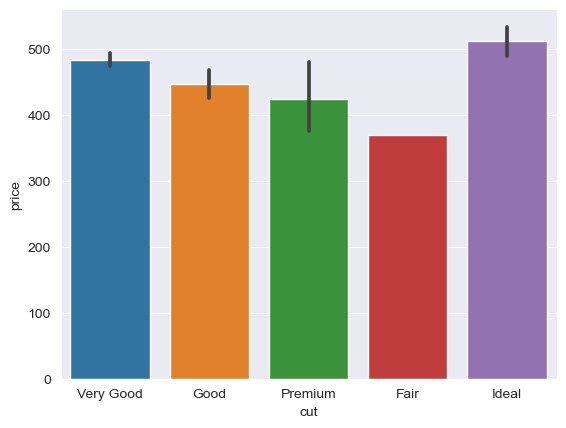

In [27]:
# Display diamond price for each cut quality (Fair, Good, Very Good, Premium, Ideal)
sns.barplot(x ="cut", y ="price", data = data)

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

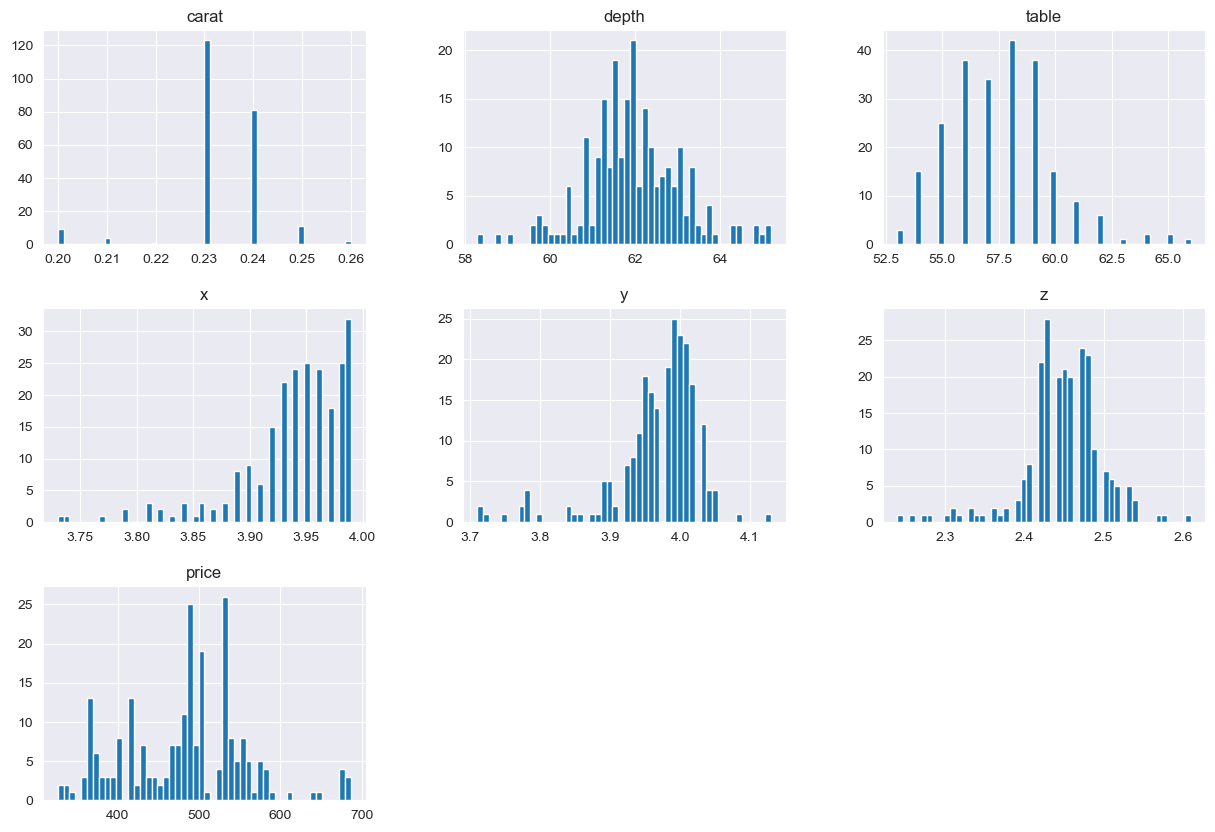

In [29]:
data.hist(bins = 50 , figsize = (15,10))

In [30]:
cat_cols = [col for col in data.columns if data.dtypes[col]=="object"]
cat_cols

['cut', 'color', 'clarity']

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [32]:
for col in cat_cols:
    data[col]=encoder.fit_transform(data[col])

In [35]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
335,0.23,4,1,5,61.8,59.0,3.90,3.93,2.42,530
723,0.23,4,1,5,61.8,59.0,3.89,3.91,2.41,472
764,0.23,4,2,6,61.0,59.0,3.93,3.97,2.41,465
835,0.24,1,2,3,60.8,64.0,3.96,4.00,2.42,373
878,0.23,4,1,6,60.9,60.0,3.96,3.99,2.42,530


In [37]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      5
table      0
x          0
y          0
z          0
price      0
dtype: int64